In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, Nadam, Adamax, Adagrad, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint



In [3]:
import os
base_dir ="C:/Users/chundie/Desktop/OriginalDataset"
img_size = (224, 224)

In [4]:
x=[]
y=[]

In [5]:
from tensorflow.keras.utils import load_img, img_to_array
for label in os.listdir(base_dir):
    label_path = os.path.join(base_dir, label)
    if os.path.isdir(label_path):
        for file in os.listdir(label_path):
            file_path = os.path.join(label_path, file)
            try:
                # Chargement de l'image et redimensionnement
                img = load_img(file_path, target_size=img_size)
                img_array = img_to_array(img) / 255.0  # Normalisation
                x.append(img_array)
                y.append(label)  # Nom du dossier = classe
            except Exception as e:
                print(f"Erreur avec {file_path} : {e}")

In [6]:
# Conversion en numpy array
x = np.array(x, dtype="float32")
y = np.array(y)

In [7]:
# Encodage des labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [8]:
x.shape

(6400, 224, 224, 3)

In [9]:
y.shape

(6400,)

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.85, random_state=42)


In [11]:
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [12]:
y_train

array([3, 3, 2, ..., 3, 3, 0], shape=(5440,))

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Crear una instancia de ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.5,
    height_shift_range=0.2,
    zoom_range=0.2,
    #horizontal_flip=True,
)



def augment_images(X_train, y_train, num_augments=4):
    X_augmented = []
    y_augmented = []

    for i in range(len(x_train)):
        # Reshape
        img = x_train[i].reshape((1,) + x_train[i].shape)

        # Generer les versiones augmenté
        augment_iter = datagen.flow(img, batch_size=1)
        for _ in range(num_augments):
            aug_img = next(augment_iter)[0]
            X_augmented.append(aug_img)
            y_augmented.append(y_train[i])

    #
    X_augmented = np.array(X_augmented)
    y_augmented = np.array(y_augmented)

    return X_augmented, y_augmented

#
X_augmented, y_augmented = augment_images(x_train, y_train, num_augments=4)

In [14]:
X_augmented.shape

(21760, 224, 224, 3)

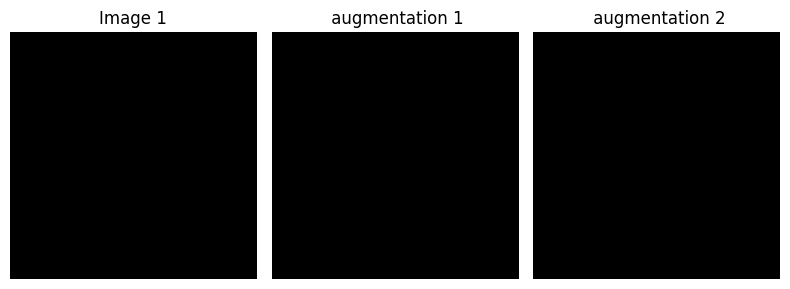

In [15]:
import matplotlib.pyplot as plt

# Création d'une figure avec 1 ligne et 2 colonnes
plt.figure(figsize=(8, 4))  # Taille optionnelle

# Première image
plt.subplot(1, 3, 1)  # 1 ligne, 2 colonnes, image 1
plt.imshow(x_train[3]/255, cmap='gray')
plt.title("Image 1")
plt.axis('off')  # cacher les axes

# Deuxième image
plt.subplot(1, 3, 2)  # 1 ligne, 2 colonnes, image 2
plt.imshow(X_augmented[2]/255, cmap='gray', vmin=0, vmax=255)
plt.title(" augmentation 1")
plt.axis('off')
#Troisième  image
plt.subplot(1, 3, 3)  # 1 ligne, 2 colonnes, image 2
plt.imshow(X_augmented[3]/255, cmap='gray', vmin=0, vmax=255)
plt.title(" augmentation 2")
plt.axis('off')


# Affichage
plt.tight_layout()
plt.show()

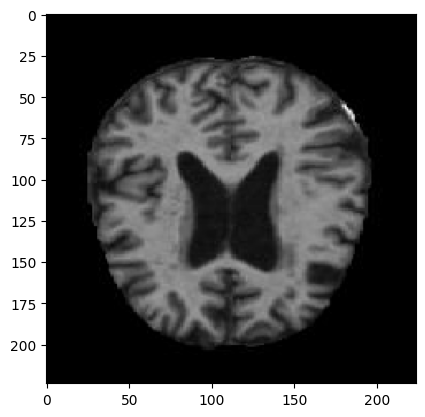

In [16]:
import matplotlib.pyplot as plt
for i in range(0,3):
    plt.imshow(x_test[i],cmap='grey')
    plt.show

In [17]:
x_train=np.expand_dims(x_train,axis=3)
x_test=np.expand_dims(x_test,axis=3)

In [18]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)


(5440, 224, 224, 1, 3)
(960, 224, 224, 1, 3)
(5440,)


In [19]:
# Normalisation:
train_images = x_train.astype("float32") / 255
test_images = x_test.astype("float32") / 255


In [20]:
x_train=np.squeeze(x_train)
x_test=np.squeeze(x_test)
print(x_train.shape)
print(x_test.shape)

(5440, 224, 224, 3)
(960, 224, 224, 3)


In [21]:
from tensorflow.keras.regularizers import l1
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

model = Sequential([
    Conv2D(filters=128, kernel_size=(3, 3), strides=(2, 2), activation='relu',
           kernel_regularizer=l1(0.01), input_shape=(224, 224, 3)),

    MaxPooling2D(pool_size=(3, 3), strides=(1, 1)),

    Conv2D(128, (3, 3), strides=(2, 2), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 2), activation='relu', padding='same'),

    Flatten(),

    Dense(100, activation='relu'),
    Dropout(0.3),
    Dense(300, activation='relu'),
    Dropout(0.3),
    Dense(200, activation='relu'),
    Dense(200, activation='relu'),

    Dense(10, activation='softmax')
])

model.summary()

c:\Users\chundie\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 111, 111, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 109, 109, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 55, 55, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 55, 55, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 55, 55, 64)     │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 193600)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │    19,360,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 300)            │        30,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 200)            │        60,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,742,410 (75.31 MB)

 Trainable params: 19,742,410 (75.31 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
sgd = tf.keras.optimizers.SGD(0.01)
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
nadam = tf.keras.optimizers.Nadam()
adamax = tf.keras.optimizers.Adamax()
adagrad = tf.keras.optimizers.Adagrad()
RMSprop = tf.keras.optimizers.RMSprop(learning_rate=0.0001)


In [23]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [24]:
model.compile(
    optimizer=adam,
    loss=losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [25]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


In [26]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [27]:
print(type(y_train))
print(y_train.dtype)
print(y_train[:5])

<class 'numpy.ndarray'>
int64
[3 3 2 2 2]


In [28]:
print(type(x_train))
print(type(x_train[0]))
print(x_train[0].shape)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(224, 224, 3)


In [29]:
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=4, min_lr=0.00001)

#early_stopping = EarlyStopping(monitor='val_loss',patience=5, restore_best_weights=True)

checkpoint_path = 'C:/Users/chundie/Desktop/pfa fatima/meilleur_model.h5'

checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy',save_best_only=True, mode='max', verbose=1)

history = model.fit(x_train, y_train, epochs=50,batch_size=100, validation_split=0.2,callbacks=[ checkpoint])

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4312 - loss: 2.5185
Epoch 1: val_accuracy improved from None to 0.50368, saving model to C:/Users/chundie/Desktop/pfa fatima/meilleur_model.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.4501 - loss: 2.0983 - val_accuracy: 0.5037 - val_loss: 1.5843
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4720 - loss: 1.5420
Epoch 2: val_accuracy did not improve from 0.50368
44/44 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.4858 - loss: 1.4467 - val_accuracy: 0.5037 - val_loss: 1.2530
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5039 - loss: 1.2389
Epoch 3: val_accuracy did not improve from 0.50368
44/44 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.5025 - loss: 1.2052 - val_accuracy: 0.4779 - val_loss: 1.1958
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5042 - loss: 1.1138
Epoch 4: val_accuracy improved from 0.50368 to 0.56710, saving model to C:/Users/chundie/Desktop/pfa fatima/meilleur_model.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.5214 - loss: 1.0704 - val_accuracy: 0.5671 - val_loss: 0.9660
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5615 - loss: 0.9817
Epoch 5: val_accuracy improved from 0.56710 to 0.57812, saving model to C:/Users/chundie/Desktop/pfa fatima/meilleur_model.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.5701 - loss: 0.9708 - val_accuracy: 0.5781 - val_loss: 0.9298
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5705 - loss: 0.9297
Epoch 6: val_accuracy improved from 0.57812 to 0.59467, saving model to C:/Users/chundie/Desktop/pfa fatima/meilleur_model.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.5809 - loss: 0.9110 - val_accuracy: 0.5947 - val_loss: 0.8341
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6157 - loss: 0.8509
Epoch 7: val_accuracy improved from 0.59467 to 0.63603, saving model to C:/Users/chundie/Desktop/pfa fatima/meilleur_model.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.6052 - loss: 0.8568 - val_accuracy: 0.6360 - val_loss: 0.7973
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6526 - loss: 0.7786
Epoch 8: val_accuracy improved from 0.63603 to 0.70680, saving model to C:/Users/chundie/Desktop/pfa fatima/meilleur_model.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.6576 - loss: 0.7560 - val_accuracy: 0.7068 - val_loss: 0.6912
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7168 - loss: 0.6598
Epoch 9: val_accuracy improved from 0.70680 to 0.76746, saving model to C:/Users/chundie/Desktop/pfa fatima/meilleur_model.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.7151 - loss: 0.6533 - val_accuracy: 0.7675 - val_loss: 0.5634
Epoch 10/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7778 - loss: 0.5411
Epoch 10: val_accuracy improved from 0.76746 to 0.80055, saving model to C:/Users/chundie/Desktop/pfa fatima/meilleur_model.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.7833 - loss: 0.5295 - val_accuracy: 0.8006 - val_loss: 0.4952
Epoch 11/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.8202 - loss: 0.4489
Epoch 11: val_accuracy improved from 0.80055 to 0.83824, saving model to C:/Users/chundie/Desktop/pfa fatima/meilleur_model.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 335s 8s/step - accuracy: 0.8307 - loss: 0.4173 - val_accuracy: 0.8382 - val_loss: 0.4250
Epoch 12/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8612 - loss: 0.3484
Epoch 12: val_accuracy improved from 0.83824 to 0.88143, saving model to C:/Users/chundie/Desktop/pfa fatima/meilleur_model.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.8750 - loss: 0.3297 - val_accuracy: 0.8814 - val_loss: 0.3365
Epoch 13/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9062 - loss: 0.2736
Epoch 13: val_accuracy improved from 0.88143 to 0.90809, saving model to C:/Users/chundie/Desktop/pfa fatima/meilleur_model.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9012 - loss: 0.2757 - val_accuracy: 0.9081 - val_loss: 0.3005
Epoch 14/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9159 - loss: 0.2365
Epoch 14: val_accuracy did not improve from 0.90809
44/44 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9157 - loss: 0.2374 - val_accuracy: 0.8952 - val_loss: 0.3455
Epoch 15/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9249 - loss: 0.2129
Epoch 15: val_accuracy improved from 0.90809 to 0.92463, saving model to C:/Users/chundie/Desktop/pfa fatima/meilleur_model.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9210 - loss: 0.2201 - val_accuracy: 0.9246 - val_loss: 0.2430
Epoch 16/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9477 - loss: 0.1722
Epoch 16: val_accuracy improved from 0.92463 to 0.93382, saving model to C:/Users/chundie/Desktop/pfa fatima/meilleur_model.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9389 - loss: 0.1832 - val_accuracy: 0.9338 - val_loss: 0.2116
Epoch 17/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9461 - loss: 0.1631
Epoch 17: val_accuracy improved from 0.93382 to 0.93474, saving model to C:/Users/chundie/Desktop/pfa fatima/meilleur_model.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9400 - loss: 0.1797 - val_accuracy: 0.9347 - val_loss: 0.2036
Epoch 18/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9504 - loss: 0.1529
Epoch 18: val_accuracy improved from 0.93474 to 0.93658, saving model to C:/Users/chundie/Desktop/pfa fatima/meilleur_model.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9483 - loss: 0.1568 - val_accuracy: 0.9366 - val_loss: 0.2181
Epoch 19/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9559 - loss: 0.1463
Epoch 19: val_accuracy improved from 0.93658 to 0.94026, saving model to C:/Users/chundie/Desktop/pfa fatima/meilleur_model.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9534 - loss: 0.1424 - val_accuracy: 0.9403 - val_loss: 0.1895
Epoch 20/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9580 - loss: 0.1324
Epoch 20: val_accuracy did not improve from 0.94026
44/44 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9580 - loss: 0.1344 - val_accuracy: 0.9384 - val_loss: 0.2100
Epoch 21/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9518 - loss: 0.1413
Epoch 21: val_accuracy improved from 0.94026 to 0.94761, saving model to C:/Users/chundie/Desktop/pfa fatima/meilleur_model.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9547 - loss: 0.1345 - val_accuracy: 0.9476 - val_loss: 0.1700
Epoch 22/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.9626 - loss: 0.1146 
Epoch 22: val_accuracy did not improve from 0.94761
44/44 ━━━━━━━━━━━━━━━━━━━━ 568s 13s/step - accuracy: 0.9586 - loss: 0.1220 - val_accuracy: 0.9228 - val_loss: 0.3355
Epoch 23/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9503 - loss: 0.1515
Epoch 23: val_accuracy did not improve from 0.94761
44/44 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9547 - loss: 0.1383 - val_accuracy: 0.9412 - val_loss: 0.2294
Epoch 24/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9612 - loss: 0.1252
Epoch 24: val_accuracy did not improve from 0.94761
44/44 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9639 - loss: 0.1154 - val_accuracy: 0.9384 - val_loss: 0.2202
Epoch 25/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9592 - loss: 0.1239
Epoch 25: val_accuracy did not improve from 

44/44 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9667 - loss: 0.1053 - val_accuracy: 0.9513 - val_loss: 0.1546
Epoch 27/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9642 - loss: 0.1097
Epoch 27: val_accuracy did not improve from 0.95129
44/44 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9658 - loss: 0.1050 - val_accuracy: 0.9375 - val_loss: 0.2343
Epoch 28/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 31s/step - accuracy: 0.9658 - loss: 0.0976 
Epoch 28: val_accuracy did not improve from 0.95129
44/44 ━━━━━━━━━━━━━━━━━━━━ 1329s 31s/step - accuracy: 0.9637 - loss: 0.1044 - val_accuracy: 0.9439 - val_loss: 0.2080
Epoch 29/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9630 - loss: 0.1102
Epoch 29: val_accuracy did not improve from 0.95129
44/44 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9628 - loss: 0.1145 - val_accuracy: 0.9513 - val_loss: 0.1611
Epoch 30/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9637 - loss: 0.1074
Epoch 30: val_accuracy improved from 0.9512

44/44 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9637 - loss: 0.1082 - val_accuracy: 0.9531 - val_loss: 0.1757
Epoch 31/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9687 - loss: 0.0916
Epoch 31: val_accuracy did not improve from 0.95312
44/44 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.9694 - loss: 0.0920 - val_accuracy: 0.9485 - val_loss: 0.1872
Epoch 32/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9659 - loss: 0.1007
Epoch 32: val_accuracy did not improve from 0.95312
44/44 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.9644 - loss: 0.1052 - val_accuracy: 0.9366 - val_loss: 0.2440
Epoch 33/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9633 - loss: 0.1014
Epoch 33: val_accuracy did not improve from 0.95312
44/44 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.9605 - loss: 0.1080 - val_accuracy: 0.9292 - val_loss: 0.3564
Epoch 34/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9675 - loss: 0.0976
Epoch 34: val_accuracy did not improve from 0.95

44/44 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9715 - loss: 0.0785 - val_accuracy: 0.9632 - val_loss: 0.1529
Epoch 43/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9757 - loss: 0.0758
Epoch 43: val_accuracy did not improve from 0.96324
44/44 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9736 - loss: 0.0801 - val_accuracy: 0.9513 - val_loss: 0.1685
Epoch 44/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9698 - loss: 0.0942
Epoch 44: val_accuracy did not improve from 0.96324
44/44 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9731 - loss: 0.0812 - val_accuracy: 0.9540 - val_loss: 0.2094
Epoch 45/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9747 - loss: 0.0690
Epoch 45: val_accuracy did not improve from 0.96324
44/44 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9750 - loss: 0.0706 - val_accuracy: 0.9430 - val_loss: 0.1734
Epoch 46/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.9732 - loss: 0.0795 
Epoch 46: val_accuracy did not improve from 0.

In [34]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Accuracy sur l’ensemble de test :", test_acc)


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.9573 - loss: 0.1418
Accuracy sur l’ensemble de test : 0.9572916626930237


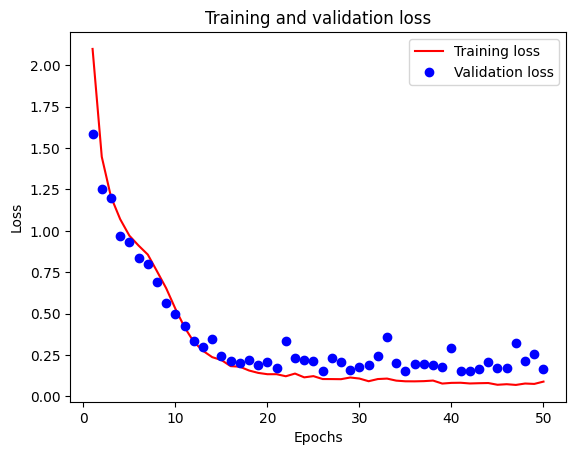

In [31]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "r", label="Training loss")
plt.plot(epochs, val_loss_values, "bo", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

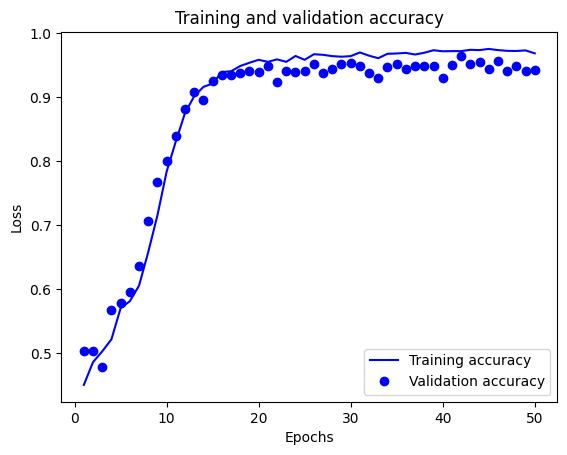

In [35]:
history_dict = history.history
history_dict.keys()
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["accuracy"]
val_loss_values = history_dict["val_accuracy"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "b", label="Training accuracy")
plt.plot(epochs, val_loss_values, "bo", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import classification_report, confusion_matrix,precision_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# testing
predictions=model.predict(test_images)
y_pred= np.argmax(predictions, axis=1)
print(y_pred.shape)
print(y_test.shape)
print(y_pred)
#predictions[predictions>0.5]=1
#predictions[predictions<=0.5]=0
#matric confusion
print("** confusion matric**")
cm = confusion_matrix(y_pred, y_test)
cm
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
#precision global
print("** precision**")
precision_score(y_pred, y_test,average='macro')

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(32, 224, 224, 1, 3), dtype=float32). Expected shape (None, 224, 224, 3), but input has incompatible shape (32, 224, 224, 1, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 224, 224, 1, 3), dtype=float32)
  • training=False
  • mask=None
  • kwargs=<class 'inspect._empty'>